# Region of Interest Basic Techniques

### Canny Edge Detection:

* Purpose: Canny edge detection is an image processing technique used to detect edges in an image. It helps identify areas with rapid intensity changes, which often correspond to object boundaries.

* Steps:

> Gaussian Smoothing: Apply a Gaussian blur to the image to reduce noise and unwanted details.
Gradient Calculation: Compute the image gradients to find the intensity changes.
Non-Maximum Suppression: Suppress non-maximum values in the gradient direction to thin the edges.
Edge Tracking by Hysteresis: Use a hysteresis thresholding technique to determine which edges to keep based on high and low threshold values.
Application in License Plate Detection: Canny edge detection can be used to highlight the edges of license plates, making it easier to identify contours or regions of interest.

### Contour Analysis:

* Purpose: Contour analysis involves identifying and analyzing continuous curves in an image. In the context of license plate detection, contours can represent the boundaries of objects, such as license plates.

* Steps:

> Find Contours: Use an algorithm (like OpenCV's findContours) to detect contours in the image.
Filter Contours: Apply filters based on contour characteristics such as area, aspect ratio, or hierarchy to exclude unwanted contours.
Draw Contours: Optionally, draw the remaining contours on the image for visualization or further analysis.
Application in License Plate Detection: Contour analysis can help isolate potential regions of interest by identifying continuous curves that may correspond to license plate boundaries.

### Contour Size Techniques:

* Purpose: Analyzing the size of contours helps filter out irrelevant or small regions, focusing on larger regions that are more likely to be license plates.

* Techniques:

> Contour Area: Filter contours based on their area. License plates are typically larger than noise or small details in an image.
Aspect Ratio: Filter contours based on their aspect ratio (width/height). License plates have a characteristic rectangular shape, and filtering by aspect ratio can help eliminate non-rectangular regions.
Bounding Box Size: Use the size of the bounding box around a contour as an additional criterion for filtering. Larger bounding boxes are more likely to represent license plates.
Application in License Plate Detection: By applying contour size techniques, you can exclude small or irrelevant contours, focusing on larger, rectangular contours that are likely to be license plates.

# Environment Setup

In [2]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.3 MB/s eta 0:00:00


# Dumb ROI

In [3]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

In [14]:
def find_number_plate(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use edge detection to find potential contours
    # Edges are where there is a sudden change in brightness or color
    # Change range is provided as 50 - 150.
    # More smaller the value output becomes noisy.
    # More higher the value output becomes too strict as it could miss some
    # edges. Hence, start with a mid value like 50 and experiment.
    edges = cv2.Canny(blurred, 50, 450)

    # Find contours in the edge-detected image. It`s like connecting the edges
    # located by the Canny to come up with a closed surface area.
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to find potential number plate region.
    # Check and track cordinates of the closed regions ,approximating with
    # a size of a number plate.
    potential_plates = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if 50000 < area < 100000:  # Adjust these thresholds based on your specific images
            potential_plates.append(contour)

    # Draw the potential plates on a copy of the original image
    plate_img = img.copy()
    cv2.drawContours(plate_img, potential_plates, -1, (0, 255, 0), 2)

    # Display the image with potential plates
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Potential Number Plates")
    plt.axis('off')
    plt.show()

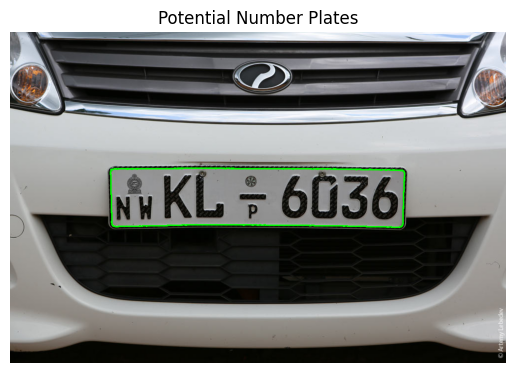

In [15]:
# Example usage
image_path = 'vehicle_2.jpg'
find_number_plate(image_path)